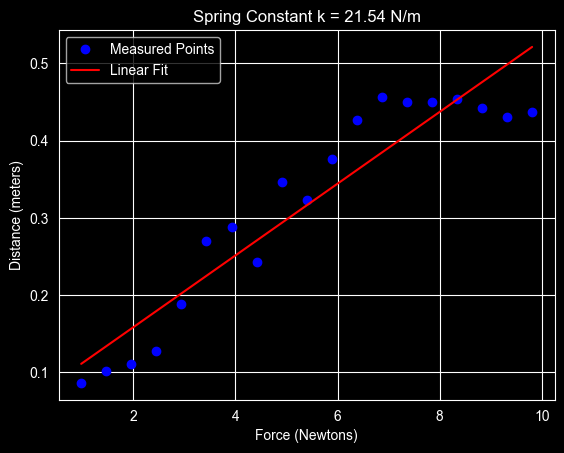

In [10]:
import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []

    # 헤더 skip
    dataFile.readline()

    for line in dataFile:
        # 콤마로 분리
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))

#여기서 while을 사용하지 않는 이유는 while은 조건이 참인 경우 계속 실행이 되기 때문에
# for을 사용하여 range 안에서만 반복함을 정해주는 것이라 이해하면 된다

    dataFile.close()
    return np.array(masses), np.array(distances) #getData로 전달된다.
#tip return은 수학적으로 치역에 가깝다
#tip2 fileName은 정의역에 가깝다

def analyze_spring_data(fileName):
    # 1. 파일에서 데이터 읽어오기
    masses, distances = getData(fileName)

    # 2. 질량을 힘으로 변환 (F = m * g)
    forces = masses * 9.81

    # 3. 모델 찾기 (1차원 직선)
    a, b = np.polyfit(forces, distances, 1)
    #np.polyfit(x, y, n): 주어진 점들을 가장 잘 통과하는 1차 함수(직선)를 찾아라
    # x : 가로축에 놓을 데이터(독립 변수에 해당된다) , y : 세로축에 놓을 데이터(종속 변수에 해당된다) n : 다항식의 차수
    predicted_distances = a * forces + b

    # 4. 스프링 상수 k 계산 (k = 1/slope)
    k = 1.0 / a

    # 5. 그래프 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')
    pylab.plot(forces, predicted_distances, 'r', label='Linear Fit')
    pylab.title(f'Spring Constant k = {k:.2f} N/m')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()


analyze_spring_data('springData.csv')

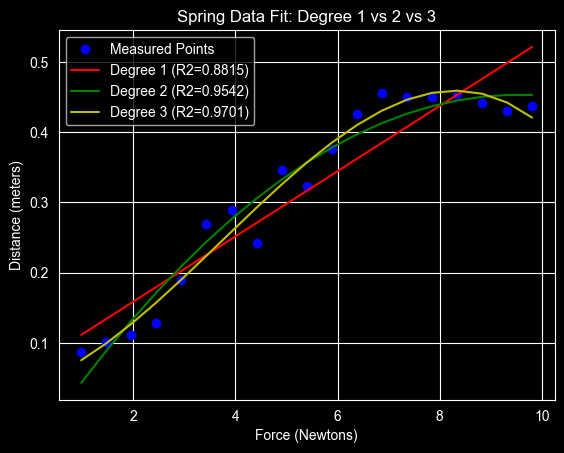

In [14]:
import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    # 파일 헤더가 있다면 건너뛰기
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def test_degrees(fileName):
    # 데이터 읽어오기
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 실제 데이터 점 찍기 (Measured Points)
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 1차, 2차, 3차 모델 각각 생성 및 그리기

    degrees = [1, 2, 3] #리스트로 저장해야하는 이유는 리스트를 사용하지 않을 경우 다음과 같은 식을 작성해야한다.
    # model1 = np.polyfit(forces, distances, 1)
    # model2 = np.polyfit(forces, distances, 2)
    # model3 = np.polyfit(forces, distances, 3)
    colors = ['r', 'g', 'y'] # 빨강, 초록, 노랑

    for d, c in zip(degrees, colors):
      #zip의 역할은 두 개 이상의 리스트를 받아서 같은 인덱끼리 짝을 지어준다 생각하면 된다.
        # 모델 생성 (fit)
        model = np.polyfit(forces, distances, d)

        # 예측값 생성 (predict)
        predicted_distances = np.polyval(model, forces)

        # R^2 계산 (결정 계수)
        error = ((predicted_distances - distances)**2).sum()
        mean_error = error / len(distances)
        variance = np.var(distances) #np.var(name) : variance of name <=> name의 분산
        r_squared = 1 - (mean_error / variance) #정확도 측정 용도로 사용함

        # 그래프 그리기
        pylab.plot(forces, predicted_distances, c,
                   label=f'Degree {d} (R2={r_squared:.4f})')

    pylab.title('Spring Data Fit: Degree 1 vs 2 vs 3')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()


test_degrees('springData.csv')

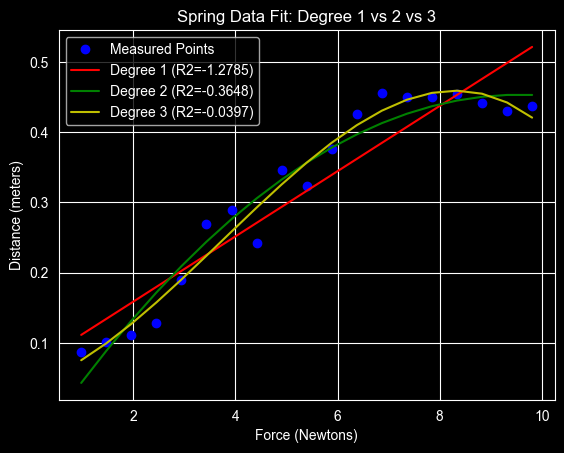

original R2 -> exp 1 R2
R2 of Degree 1 : 0.8815 -> -1.2785
R2 of Degree 2 : 0.9542 -> -0.3648
R2 of Degree 3 : 0.9701 -> -0.0397


In [17]:
#exp1 : abs VS 제곱

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    # 파일 헤더가 있다면 건너뛰기
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def test_degrees(fileName):
    # 데이터 읽어오기
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 실제 데이터 점 찍기 (Measured Points)
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 1차, 2차, 3차 모델 각각 생성 및 그리기

    degrees = [1, 2, 3] #리스트로 저장해야하는 이유는 리스트를 사용하지 않을 경우 다음과 같은 식을 작성해야한다.
    # model1 = np.polyfit(forces, distances, 1)
    # model2 = np.polyfit(forces, distances, 2)
    # model3 = np.polyfit(forces, distances, 3)
    #cf 만약 append로 degrees를 추가 할 경우 colors에도 새로운 색을 지정해주어야 한다.
    colors = ['r', 'g', 'y'] # 빨강, 초록, 노랑

    for d, c in zip(degrees, colors):
      #zip의 역할은 두 개 이상의 리스트를 받아서 같은 인덱끼리 짝을 지어준다 생각하면 된다.
        # 모델 생성 (fit)
        model = np.polyfit(forces, distances, d)

        # 예측값 생성 (predict)
        predicted_distances = np.polyval(model, forces)

        # R^2 계산 (결정 계수)
        error = (abs(predicted_distances - distances)).sum()
        mean_error = error / len(distances)
        variance = np.var(distances) #np.var(name) : variance of name <=> name의 분산
        r_squared = 1 - (mean_error / variance) #정확도 측정 용도로 사용함

        # 그래프 그리기
        pylab.plot(forces, predicted_distances, c,
                   label=f'Degree {d} (R2={r_squared:.4f})')

    pylab.title('Spring Data Fit: Degree 1 vs 2 vs 3')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()


test_degrees('springData.csv')

#result:
print('original R2 -> exp 1 R2')
print(f'R2 of Degree 1 : 0.8815 -> -1.2785' )
print(f'R2 of Degree 2 : 0.9542 -> -0.3648' )
print(f'R2 of Degree 3 : 0.9701 -> -0.0397' )


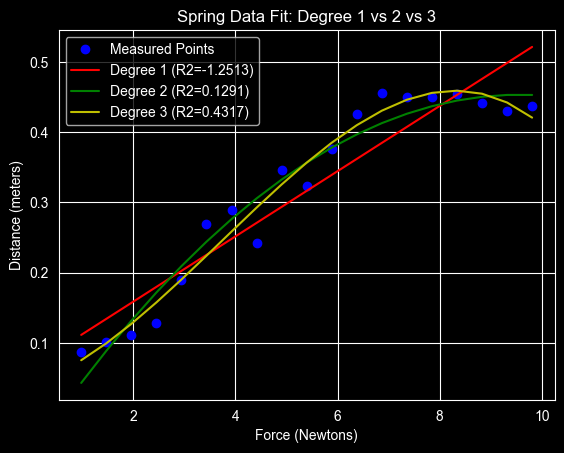

original R2 -> exp 2 R2
R2 of Degree 1 : 0.8815 -> -1.2513
R2 of Degree 2 : 0.9542 -> 0.1291
R2 of Degree 3 : 0.9701 -> 0.4317


In [19]:
#exp 2 : DEL len(distance)

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    # 파일 헤더가 있다면 건너뛰기
    dataFile.readline()
    for line in dataFile:
        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return np.array(masses), np.array(distances)

def test_degrees(fileName):
    # 데이터 읽어오기
    masses, distances = getData(fileName)
    forces = masses * 9.81

    # 실제 데이터 점 찍기 (Measured Points)
    pylab.plot(forces, distances, 'bo', label='Measured Points')

    # 1차, 2차, 3차 모델 각각 생성 및 그리기

    degrees = [1, 2, 3] #리스트로 저장해야하는 이유는 리스트를 사용하지 않을 경우 다음과 같은 식을 작성해야한다.
    # model1 = np.polyfit(forces, distances, 1)
    # model2 = np.polyfit(forces, distances, 2)
    # model3 = np.polyfit(forces, distances, 3)
    #cf 만약 append로 degrees를 추가 할 경우 colors에도 새로운 색을 지정해주어야 한다.
    colors = ['r', 'g', 'y'] # 빨강, 초록, 노랑

    for d, c in zip(degrees, colors):
      #zip의 역할은 두 개 이상의 리스트를 받아서 같은 인덱끼리 짝을 지어준다 생각하면 된다.
        # 모델 생성 (fit)
        model = np.polyfit(forces, distances, d)

        # 예측값 생성 (predict)
        predicted_distances = np.polyval(model, forces)

        # R^2 계산 (결정 계수)
        error = ((predicted_distances - distances)**2).sum()
        mean_error = error #/ len(distances)
        variance = np.var(distances) #np.var(name) : variance of name <=> name의 분산
        r_squared = 1 - (mean_error / variance) #정확도 측정 용도로 사용함

        # 그래프 그리기
        pylab.plot(forces, predicted_distances, c,
                   label=f'Degree {d} (R2={r_squared:.4f})')

    pylab.title('Spring Data Fit: Degree 1 vs 2 vs 3')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()


test_degrees('springData.csv')

#result:
print('original R2 -> exp 2 R2')
print(f'R2 of Degree 1 : 0.8815 -> -1.2513' )
print(f'R2 of Degree 2 : 0.9542 -> 0.1291' )
print(f'R2 of Degree 3 : 0.9701 -> 0.4317' )

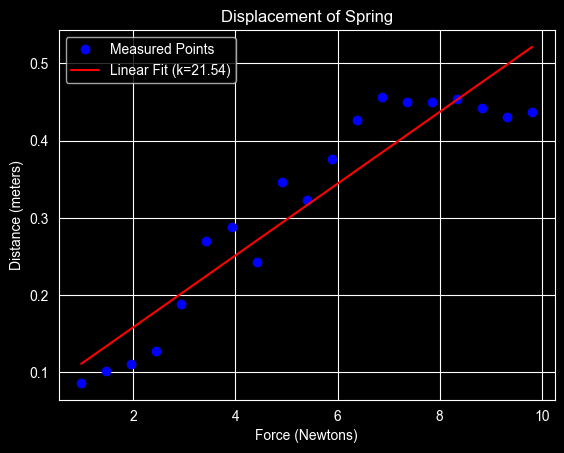

In [20]:
import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []

    dataFile.readline()

    for line in dataFile:

        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))

    dataFile.close()
    return np.array(masses), np.array(distances)

def fitData(fileName):
    masses, distances = getData(fileName)

    # 2. 질량을 힘으로 변환 (F = m * g)
    distances = np.array(distances)
    g = 9.81 #중력 가속도를 의미한다.
    forces = np.array(masses) * g

    # 3. 모델 찾기 (Linear Regression)
    # polyfit(x, y, 1): 1차식(ax + b)의 계수 a(기울기), b(절편)를 반환
    a, b = np.polyfit(forces, distances, 1)

    # 4. 예측값 생성 (y = ax + b)
    predicted_distances = a * forces + b

    # 5. 용수철 상수 k 계산 (F = kx -> k = F/x -> k = 1/a)
    k = 1.0 / a

    # 6. 그래프 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')
    pylab.plot(forces, predicted_distances, 'r', label=f'Linear Fit (k={k:.2f})')
    pylab.title('Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
fitData('springData.csv')

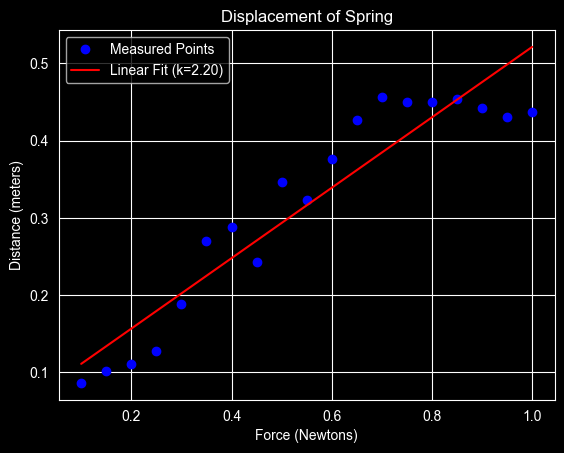

In [21]:
# exp 1 : g = 9.81 -> Del g

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []

    dataFile.readline()

    for line in dataFile:

        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))

    dataFile.close()
    return np.array(masses), np.array(distances)

def fitData(fileName):
    masses, distances = getData(fileName)

    # 2. 질량을 힘으로 변환 (F = m * g)
    distances = np.array(distances)
    g = 9.81 #중력 가속도를 의미한다.
    forces = np.array(masses) #* g

    # 3. 모델 찾기 (Linear Regression)
    # polyfit(x, y, 1): 1차식(ax + b)의 계수 a(기울기), b(절편)를 반환
    a, b = np.polyfit(forces, distances, 1)

    # 4. 예측값 생성 (y = ax + b)
    predicted_distances = a * forces + b

    # 5. 용수철 상수 k 계산 (F = kx -> k = F/x -> k = 1/a)
    k = 1.0 / a

    # 6. 그래프 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')
    pylab.plot(forces, predicted_distances, 'r', label=f'Linear Fit (k={k:.2f})')
    pylab.title('Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
fitData('springData.csv')

#result:
print('original k -> exp 1 k')
print(f'Linear Fit : 21.54 -> 2.20' )

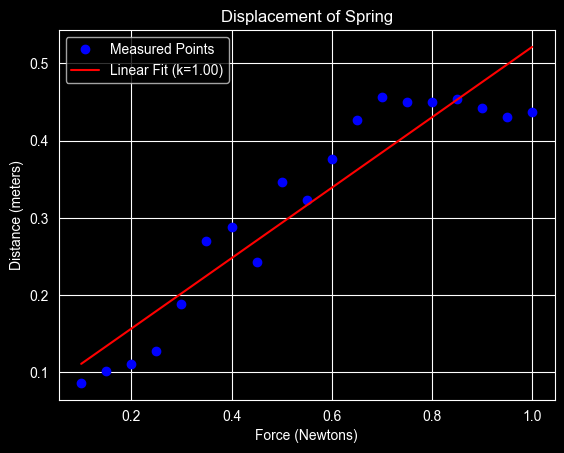

original k -> exp 2 k
Linear Fit : 21.54 -> 1


In [23]:
# exp 2 : k = 1.0 / a -> k = 1.0

import pylab
import numpy as np

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []

    dataFile.readline()

    for line in dataFile:

        d, m = line.split(',')
        distances.append(float(d))
        masses.append(float(m))

    dataFile.close()
    return np.array(masses), np.array(distances)

def fitData(fileName):
    masses, distances = getData(fileName)

    # 2. 질량을 힘으로 변환 (F = m * g)
    distances = np.array(distances)
    g = 9.81 #중력 가속도를 의미한다.
    forces = np.array(masses) #* g

    # 3. 모델 찾기 (Linear Regression)
    # polyfit(x, y, 1): 1차식(ax + b)의 계수 a(기울기), b(절편)를 반환
    a, b = np.polyfit(forces, distances, 1)

    # 4. 예측값 생성 (y = ax + b)
    predicted_distances = a * forces + b

    # 5. 용수철 상수 k 계산 (F = kx -> k = F/x -> exp2) => k = 1)
    k = 1.0

    # 6. 그래프 그리기
    pylab.plot(forces, distances, 'bo', label='Measured Points')
    pylab.plot(forces, predicted_distances, 'r', label=f'Linear Fit (k={k:.2f})')
    pylab.title('Displacement of Spring')
    pylab.xlabel('Force (Newtons)')
    pylab.ylabel('Distance (meters)')
    pylab.legend(loc='best')
    pylab.show()

# 실행
fitData('springData.csv')

#result:
print('original k -> exp 2 k')
print(f'Linear Fit : 21.54 -> 1' )